In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

## Main function

In [2]:
img = cv2.imread("data/Images/IMG_3922.JPEG")

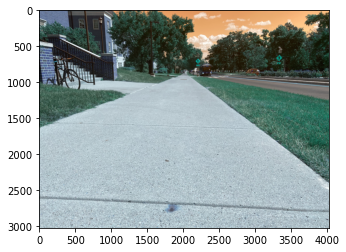

In [3]:
plt.imshow(img)

In [4]:
# img = cv2.imread('/home/img/python.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

Original Dimensions :  (3024, 4032, 3)


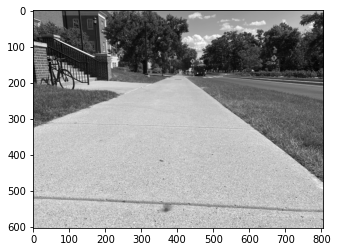

In [5]:
# rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# plt.imshow(rgb_image)
color_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap = 'gray')

## WORK WITH RESIZED, RGB PICTURES

__Break picture to 3 channels__

In [6]:
# red_channel = rgb_image[:,:,0]
# green_channel = rgb_image[:,:,1]
# blue_channel = rgb_image[:,:,2]

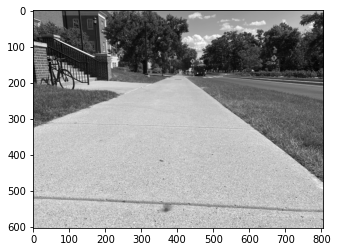

In [7]:
plt.imshow(gray_image, cmap='gray')

In [8]:
target_image = gray_image

In [9]:
target_image

array([[120, 129, 135, ..., 178, 178, 178],
       [137, 135, 123, ..., 178, 178, 178],
       [123, 116, 136, ..., 178, 178, 178],
       ...,
       [200, 186, 182, ..., 171, 176, 165],
       [210, 216, 212, ..., 157, 156, 185],
       [185, 189, 204, ..., 186, 189, 205]], dtype=uint8)

__Draw a horizontal line y = 300__

In [10]:
target_image[300,:].reshape(1,-1).shape


(1, 806)

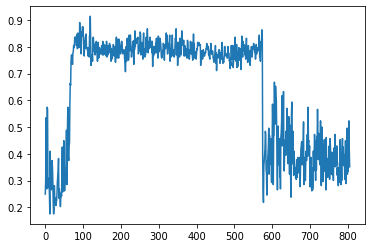

In [11]:
plt.plot(target_image[300,:].reshape(1,-1)[0] / 256)

### Calculate gradient of this pic

In [12]:
target = target_image / 256

In [13]:
## Green channel\
gradients = []
row = 300
for i in range(804):
    index = i + 1
    dx = (target[row, index + 1] - target[row, index - 1]) * (1/2)
    dy = (target[row+1, index] - target[row-1, index]) * (1/2)
    gradient = np.sqrt(dy ** 2 + dx ** 2)
    gradients.append(gradient)

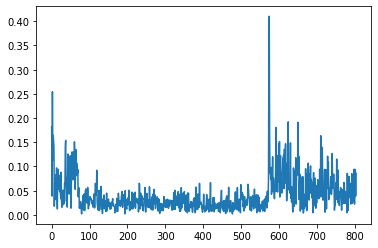

In [14]:
gradients = np.array(gradients)
plt.plot(gradients)

## Calculate Laplacian of this pic

In [15]:
## Green channel\
laplacians = []
row = 300
for i in range(804):
    index = i + 1
    dx_squared = (target[row, index + 1] - 2 * target[row, index] + target[row, index - 1])
    dy_squared = (target[row+1, index] - 2 * target[row, index] +  target[row-1, index]) 
    laplacian = dx_squared + dy_squared
    laplacians.append(laplacian)

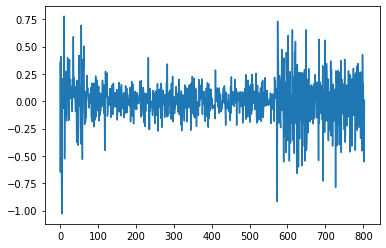

In [16]:
laplacians = np.array(laplacians)
plt.plot(laplacians)

### Apply Guassian blur to smoothen image

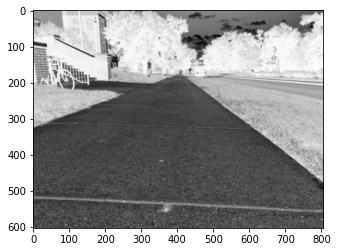

In [17]:
dst = cv2.GaussianBlur(target_image,(3,3),cv2.BORDER_DEFAULT)
plt.imshow(dst, cmap='Greys')

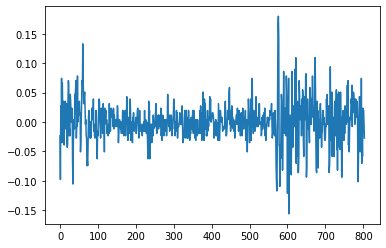

In [18]:
target = dst / 256

laplacians = []
row = 300
for i in range(804):
    index = i + 1
    dx_squared = (target[row, index + 1] - 2 * target[row, index] + target[row, index - 1])
    dy_squared = (target[row+1, index] - 2 * target[row, index] +  target[row-1, index]) 
    laplacian = dx_squared + dy_squared
    laplacians.append(laplacian)
    
laplacians = np.array(laplacians)
plt.plot(laplacians)

### Edge detection

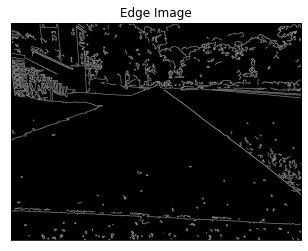

In [19]:
edges = cv2.Canny(dst,100,200)

plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


### TRY TEMPLATE MATCHING

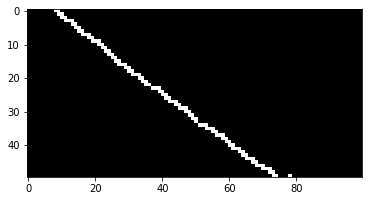

In [20]:
plt.imshow(edges[250:300, 500:600], cmap='gray')

In [21]:
# # METHODS
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [22]:
# Template and threshold
threshold = 0.3
template = edges[250:300, 500:600]
template2 = edges[240:290,150:250]
# Matching method
method = eval('cv2.TM_CCORR_NORMED')

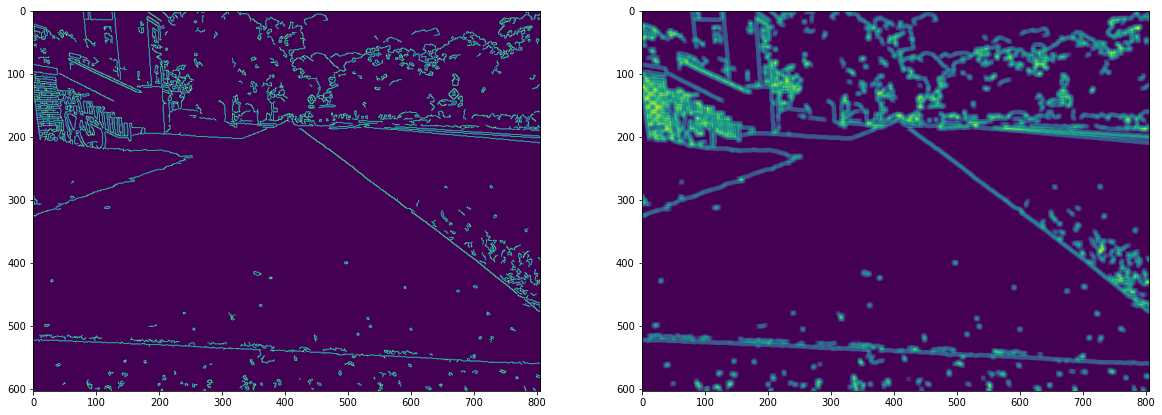

In [23]:
kernel = np.ones((7,7),np.float32)/25
dst = cv2.filter2D(edges,-1,kernel)

f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(edges)
ax2.imshow(dst)

In [24]:
# Right-side Edge detection
res = cv2.matchTemplate(dst,template, method)
ret, thresh1 = cv2.threshold(res, threshold, 255, cv2.THRESH_BINARY)

# Left-side Edge detection
res2 = cv2.matchTemplate(dst,template2, 3)
ret2, thresh2 = cv2.threshold(res2, threshold, 255, cv2.THRESH_BINARY)

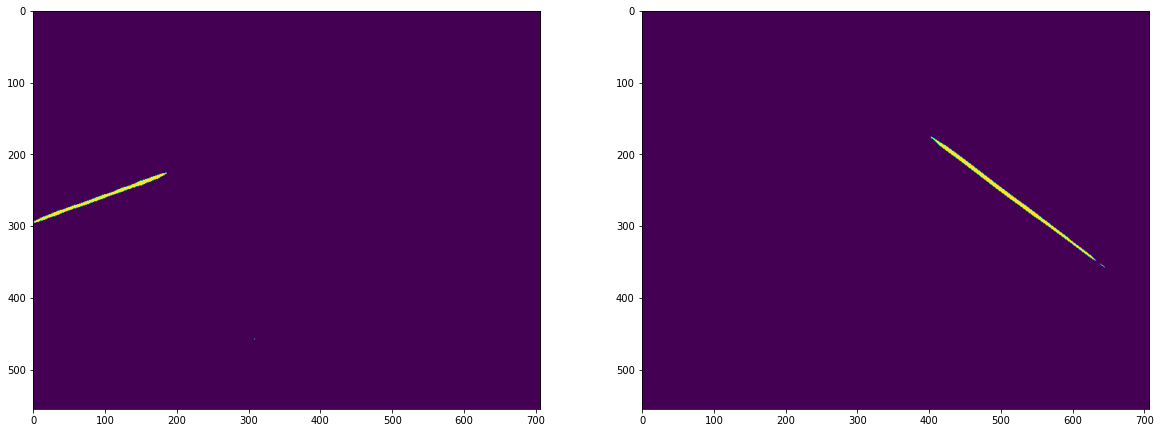

In [25]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(thresh2)
ax2.imshow(thresh1)

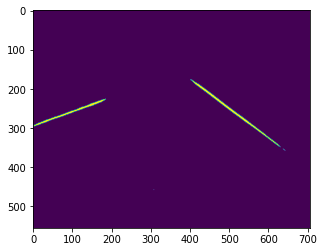

In [26]:
final_cut = thresh1 + thresh2
plt.imshow(final_cut)

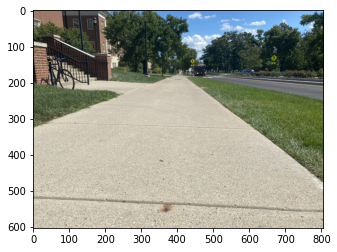

In [27]:
copy_image = color_image.copy()
plt.imshow(copy_image)

### Fit linear regression model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
left_points = []
right_points = []
final_cut2 = thresh1 + thresh2

for i in range(final_cut2.shape[0]):
    for j in range(final_cut2.shape[1]):
        if final_cut2[i, j] != 0:
            if j <= final_cut2.shape[1] / 2:
                left_points.append([i, j])
            else:
                right_points.append([i, j])

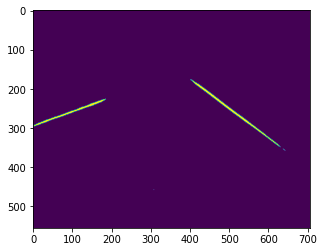

In [30]:
plt.imshow(final_cut2)

In [31]:
left_line = np.array(left_points)
right_line = np.array(right_points)

In [32]:
# # Left line
# Y_left = left_line[:, 0].reshape(-1, 1)
# X_left = left_line[:, 1].reshape(-1, 1)

# # Right line
# Y_right = right_line[:, 0].reshape(-1, 1)
# X_right = right_line[:, 1].reshape(-1, 1)

# reg_left = LinearRegression().fit(X_left, Y_left)
# reg_right = LinearRegression().fit(X_right, Y_right)

# # Draw fitted lines

# for i in range(final_cut2.shape[0]):
#     leftDot  = int(reg_left.predict(np.array([[i]])))
#     rightDot = int(reg_right.predict(np.array([[i]])) )
#     if  leftDot <  final_cut2.shape[0] and leftDot >= 0:
#         final_cut2[leftDot, i] = 255
#     if  rightDot <  final_cut2.shape[0] and rightDot >= 0:
#         final_cut2[rightDot, i] = 255

### RANSAC

In [33]:
from sklearn import linear_model

# Left line
Y_left2 = left_line[:, 0].reshape(-1, 1)
X_left2 = left_line[:, 1].reshape(-1, 1)

# Right line
Y_right2 = right_line[:, 0].reshape(-1, 1)
X_right2 = right_line[:, 1].reshape(-1, 1)

# Robustly fit linear model with RANSAC algorithm
ransacLeft = linear_model.RANSACRegressor()
ransacLeft.fit(X_left2, Y_left2)
ransacRight = linear_model.RANSACRegressor()
ransacRight.fit(X_right2, Y_right2)

for i in range(final_cut2.shape[0]):
    leftDot  = int(ransacLeft.predict(np.array([[i]])))
    rightDot = int(ransacRight.predict(np.array([[i]])) )
    if  leftDot <  final_cut2.shape[0] and leftDot >= 0:
        final_cut2[leftDot, i] = 255
    if  rightDot <  final_cut2.shape[0] and rightDot >= 0:
        final_cut2[rightDot, i] = 255

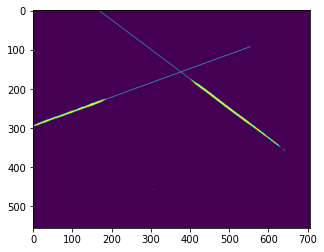

In [34]:
plt.imshow(final_cut2)

Text(0.5, 1.0, 'Lines detected')

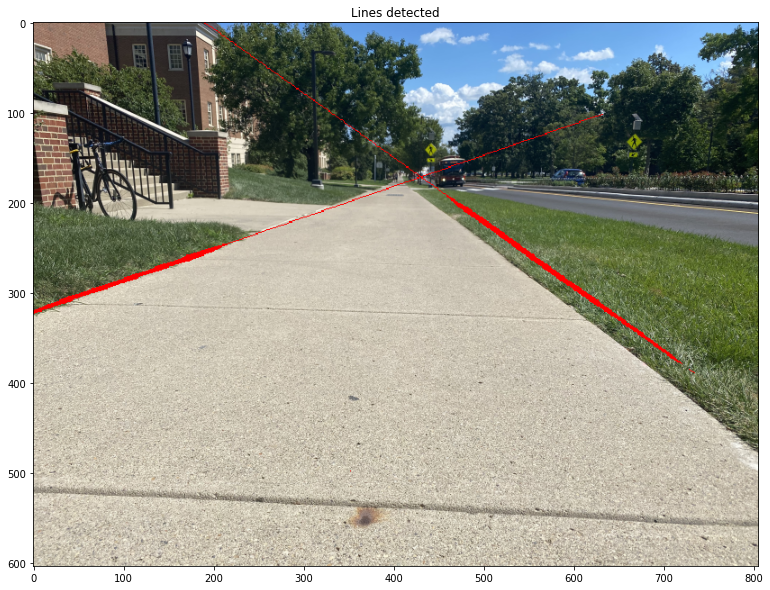

In [35]:
# for i in range(final_cut.shape[0]):
#     for j in range(final_cut.shape[1]):
#         if final_cut[i, j] != 0:
#             # Rescale y
#             i_y = (i / (final_cut.shape[0])) * (color_image.shape[0])
#             j_x = (j / (final_cut.shape[1])) * (color_image.shape[1])
#             copy_image[int(i_y), int(j_x)] = [255, 0, 0]

for i in range(copy_image.shape[0]):
    for j in range(copy_image.shape[1]):
        i_y = (i / (copy_image.shape[0])) * (final_cut2.shape[0])
        j_x = (j / (copy_image.shape[1])) * (final_cut2.shape[1])
        if final_cut2[int(i_y), int(j_x)] != 0:
#             if j <= copy_image.shape[1] / 2:
#                 left_points.append([i, j])
#             else:
#                 right_points.append([i, j])
            # Color the pixel 
            copy_image[i, j] = [255, 0, 0]
        
# Display

f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111)
# ax2 = f.add_subplot(122)
ax.imshow(copy_image)
# ax2.imshow(copy_image)
plt.title("Lines detected")